In [2]:
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import pandas as pd
import mpld3
mpld3.enable_notebook()

import matplotlib.pyplot as plt
#%matplotlib inline

import glob

In [3]:
%load_ext version_information

%version_information numpy, pandas, scipy, matplotlib, sympy, version_information

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.16299 SP0
numpy 1.14.3
pandas 0.23.0
scipy 1.1.0
matplotlib 2.2.2
sympy 1.1.1
version_information 1.0.3
Sun Sep 30 21:45:34 2018 Russia TZ 2 Standard Time

In [4]:
def load_dflist_txt(txt_namelist):
    return [pd.read_csv(filename, sep='\t', header=None, names = ["Wavelength, nm",  filename[:len(filename)-4]])
            for filename in txt_namelist]

colorlist = [(102/255, 94/255, 252/255), #blue, 
             (255/255, 175/255, 43/255), #orange, 
             (255/255, 81/255, 152/255), #magenta, 
             (0, 179/255, 0),            #green, 
             (59/255, 217/255, 233/255), #cyan, 
             (188/255, 0, 188/255),      #purple
             (210/255,105/255,30/255),      #chocolate
             (220/255,20/255,60/255), #crimson
             (255/255,215/255,0), #gold
             (65/255,105/255,0), #royalblue
             (75/255,0, 130/255), #indigo
             (135/255,206/255, 250/255) #lightskyblue
            ] 

label_dict = {"C2-line":[516] 
             } 


In [5]:
txt_namelist = glob.glob("*.txt") #recursive=True # for /**/*.txt"
print(txt_namelist)
dflist = load_dflist_txt(txt_namelist)
print(len(dflist))

['MSU oceanOptics.txt', 'UEF hamamatsu.txt']
2


In [10]:
def multi_plot(number_per_figure, 
               C2 = False,
               normMax = False):
    size = (14,5)
    int(len(df_list)/number_per_figure)
    plt.figure(figsize  = size)
    plt.grid(True)
    for k in range(int(len(df_list)/number_per_figure)):
        
        ax = plt.gca()
        ax.set(ylabel='Intensity, a.u.')
        ax.set(xlabel='Wavelength, nm')
        
        
        if C2:
            plt.plot(label_dict["C2-line"]*2, [0,1000*((-1+1/1000)*normMax+1)],  color=colorlist[-1], linewidth = 1) #G-line
            plt.text(label_dict["C2-line"][0]+10, 1000*((-1+1/1000)*normMax+1)+.05,
                         "C2", ha = 'right', va = 'bottom')
            
        # ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
        for n in range(number_per_figure):
#         (-1+1/df_list[k*number_per_figure + n].iloc[:,1].max())*normMax + 1 instead df_list[k*number_per_figure + n].iloc[:,1]
            plt.plot(df_list[k*number_per_figure + n].iloc[:,0], df_list[k*number_per_figure + n].iloc[:,1].multiply((-1+1/df_list[k*number_per_figure + n].iloc[:,1].max())*normMax+1),
                     label = df_list[k*number_per_figure + n].columns[1] + "_" + str(k*number_per_figure + n),
                     color=colorlist[(k*number_per_figure + n)%len(colorlist)])
        ax.legend(loc='upper center', bbox_to_anchor=(1.01, 1.05), ncol=1, fancybox=True, shadow=True, title = "File_name and index in list")
        plt.figure(figsize  = size)
    
    
    for k in range(len(df_list)%number_per_figure):
#         df_list[-1-k].plot()
        
        ax = plt.gca()
        ax.set(ylabel='Intensity, a.u.')
        ax.set(xlabel='Wavelength, nm')
        
        if C2:
            plt.plot(label_dict["C2-line"]*2, [0,1000*((-1+1/1000)*normMax+1)],  color=colorlist[-1], linewidth = 1) #G-line
            plt.text(label_dict["C2-line"][0]+10, 1000*((-1+1/1000)*normMax+1)+.05,
                         "C2", ha = 'right', va = 'bottom')
        
        plt.plot(df_list[-1-k].iloc[:,0], df_list[-1-k].iloc[:,1].multiply((-1+1/df_list[-1-k].iloc[:,1].max())*normMax+1), label = df_list[-1-k].columns[1] + "_" + str(-1-k),
                 color=colorlist[k%len(colorlist)],
                linewidth = 1.)
        ax.legend(loc='upper center', bbox_to_anchor=(1.01, 1.05), ncol=1, fancybox=True, shadow=True, title="File_name and index in list")
    

    
    
    plt.grid(True)
    
    plt.show()

In [7]:
df_list = dflist[::-1]
print("Total number of spectra: ", len(dflist))
print("Total number of spectra for analize: ", len(df_list))

Total number of spectra:  2
Total number of spectra for analize:  2


In [8]:
comma_to_dot = dflist[0].iloc[:,:].copy()
dflist[0].iloc[:,0] = comma_to_dot.iloc[:,0].str.replace(',','.').astype(np.float64)
dflist[0].iloc[:,1] = comma_to_dot.iloc[:,1].str.replace(',','.').astype(np.float64)

dflist[0].dtypes

Wavelength, nm     float64
MSU oceanOptics    float64
dtype: object

In [11]:
mpld3.enable_notebook()
interact_manual(multi_plot, 
                number_per_figure=widgets.IntSlider(min=1,max=10,step=1,value=2),
                C2 = widgets.Checkbox(value=True, description='IFM line 960', disabled=False),
                normMax = widgets.Checkbox(value=True, description='Devide by MaxIntens', disabled=False))

interactive(children=(IntSlider(value=2, description='number_per_figure', max=10, min=1), Checkbox(value=True,…

<function __main__.multi_plot(number_per_figure, C2=False, normMax=False)>

## Lets compare resolution

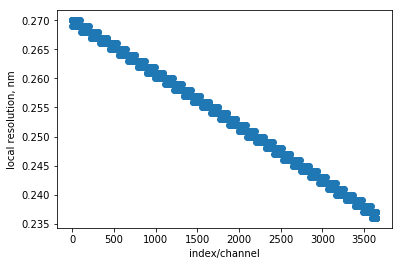

In [12]:
ocean = dflist[0].iloc[:,0].values
delta_o = ocean[:] - ocean[:, np.newaxis]
# ocean_delta_df = pd.DataFrame(delta_o)
# ocean_delta_df.head()
resolution_ocean = np.diag(delta_o, +1)
plt.ylabel('local resolution, nm')
plt.xlabel('index/channel')
plt.plot(resolution_ocean, 'o-', label ="MSU ocean")

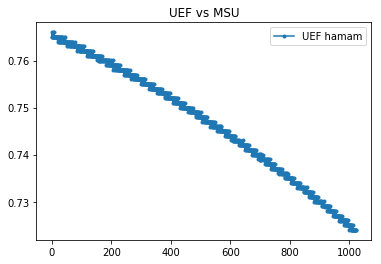

In [13]:
hamam = dflist[1].iloc[:,0].values
delta_h = hamam[:] - hamam[:, np.newaxis]
resolution_hamam = np.diag(delta_h, +1)
plt.title('UEF vs MSU')
plt.plot(resolution_hamam, '.-', label ="UEF hamam" )
plt.legend()
plt.show()